In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. IMPORTING NECESSARY LIBRARIES & PACKAGES**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,  RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

**2. LOADING THE TRAINING DATASET**

In [3]:
df1 = pd.read_csv("/content/drive/MyDrive/DBA PROJECT DATASET/loan_prediction_train.csv")
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**3. UNDERSTANDING THE DATA**

In [4]:
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df1.shape

(614, 13)

In [6]:
df1.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [8]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df1.duplicated().sum()

0

**4. DATA EXPLORATION (EXPLORATORY DATA ANALYSIS) AND DATA PREPROCESSING**

In [10]:
df1.isnull().sum().sort_values(ascending=False)

,0
Credit_History,50
Self_Employed,32
LoanAmount,22
Dependents,15
Loan_Amount_Term,14
Gender,13
Married,3
Loan_ID,0
Education,0
ApplicantIncome,0


In [11]:
print('Gender Mode: ',df1['Gender'].mode())
print('Married mode: ',df1['Married'].mode())
print('Self_Employed',df1['Self_Employed'].mode())
print('Credit_History',df1['Credit_History'].mode())

Gender Mode:  0    Male
Name: Gender, dtype: object
Married mode:  0    Yes
Name: Married, dtype: object
Self_Employed 0    No
Name: Self_Employed, dtype: object
Credit_History 0    1.0
Name: Credit_History, dtype: float64


In [12]:
df1['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [13]:
df1['Dependents'].replace('3+',3,inplace=True)#Replacing 3+ to 3
df1['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3,51


In [14]:
df1['Gender'].fillna(df1['Gender'].mode()[0],inplace=True)
df1['Married'].fillna(df1['Married'].mode()[0],inplace=True)
df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0],inplace=True)
df1['LoanAmount'].fillna((df1['LoanAmount'].mean()),inplace=True)
df1['Loan_Amount_Term'].fillna('84', inplace = True)
df1['Credit_History'].fillna('1.0', inplace = True)
df1['Dependents'].fillna(df1['Dependents'].mode()[0],inplace=True)

In [15]:
df1['Dependents']=df1['Dependents'].astype('int')
df1['Dependents'].dtype

dtype('int64')

In [16]:
df1.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [17]:
df1 = df1.drop('Loan_ID', axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    object 
 9   Credit_History     614 non-null    object 
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 62.4+ KB


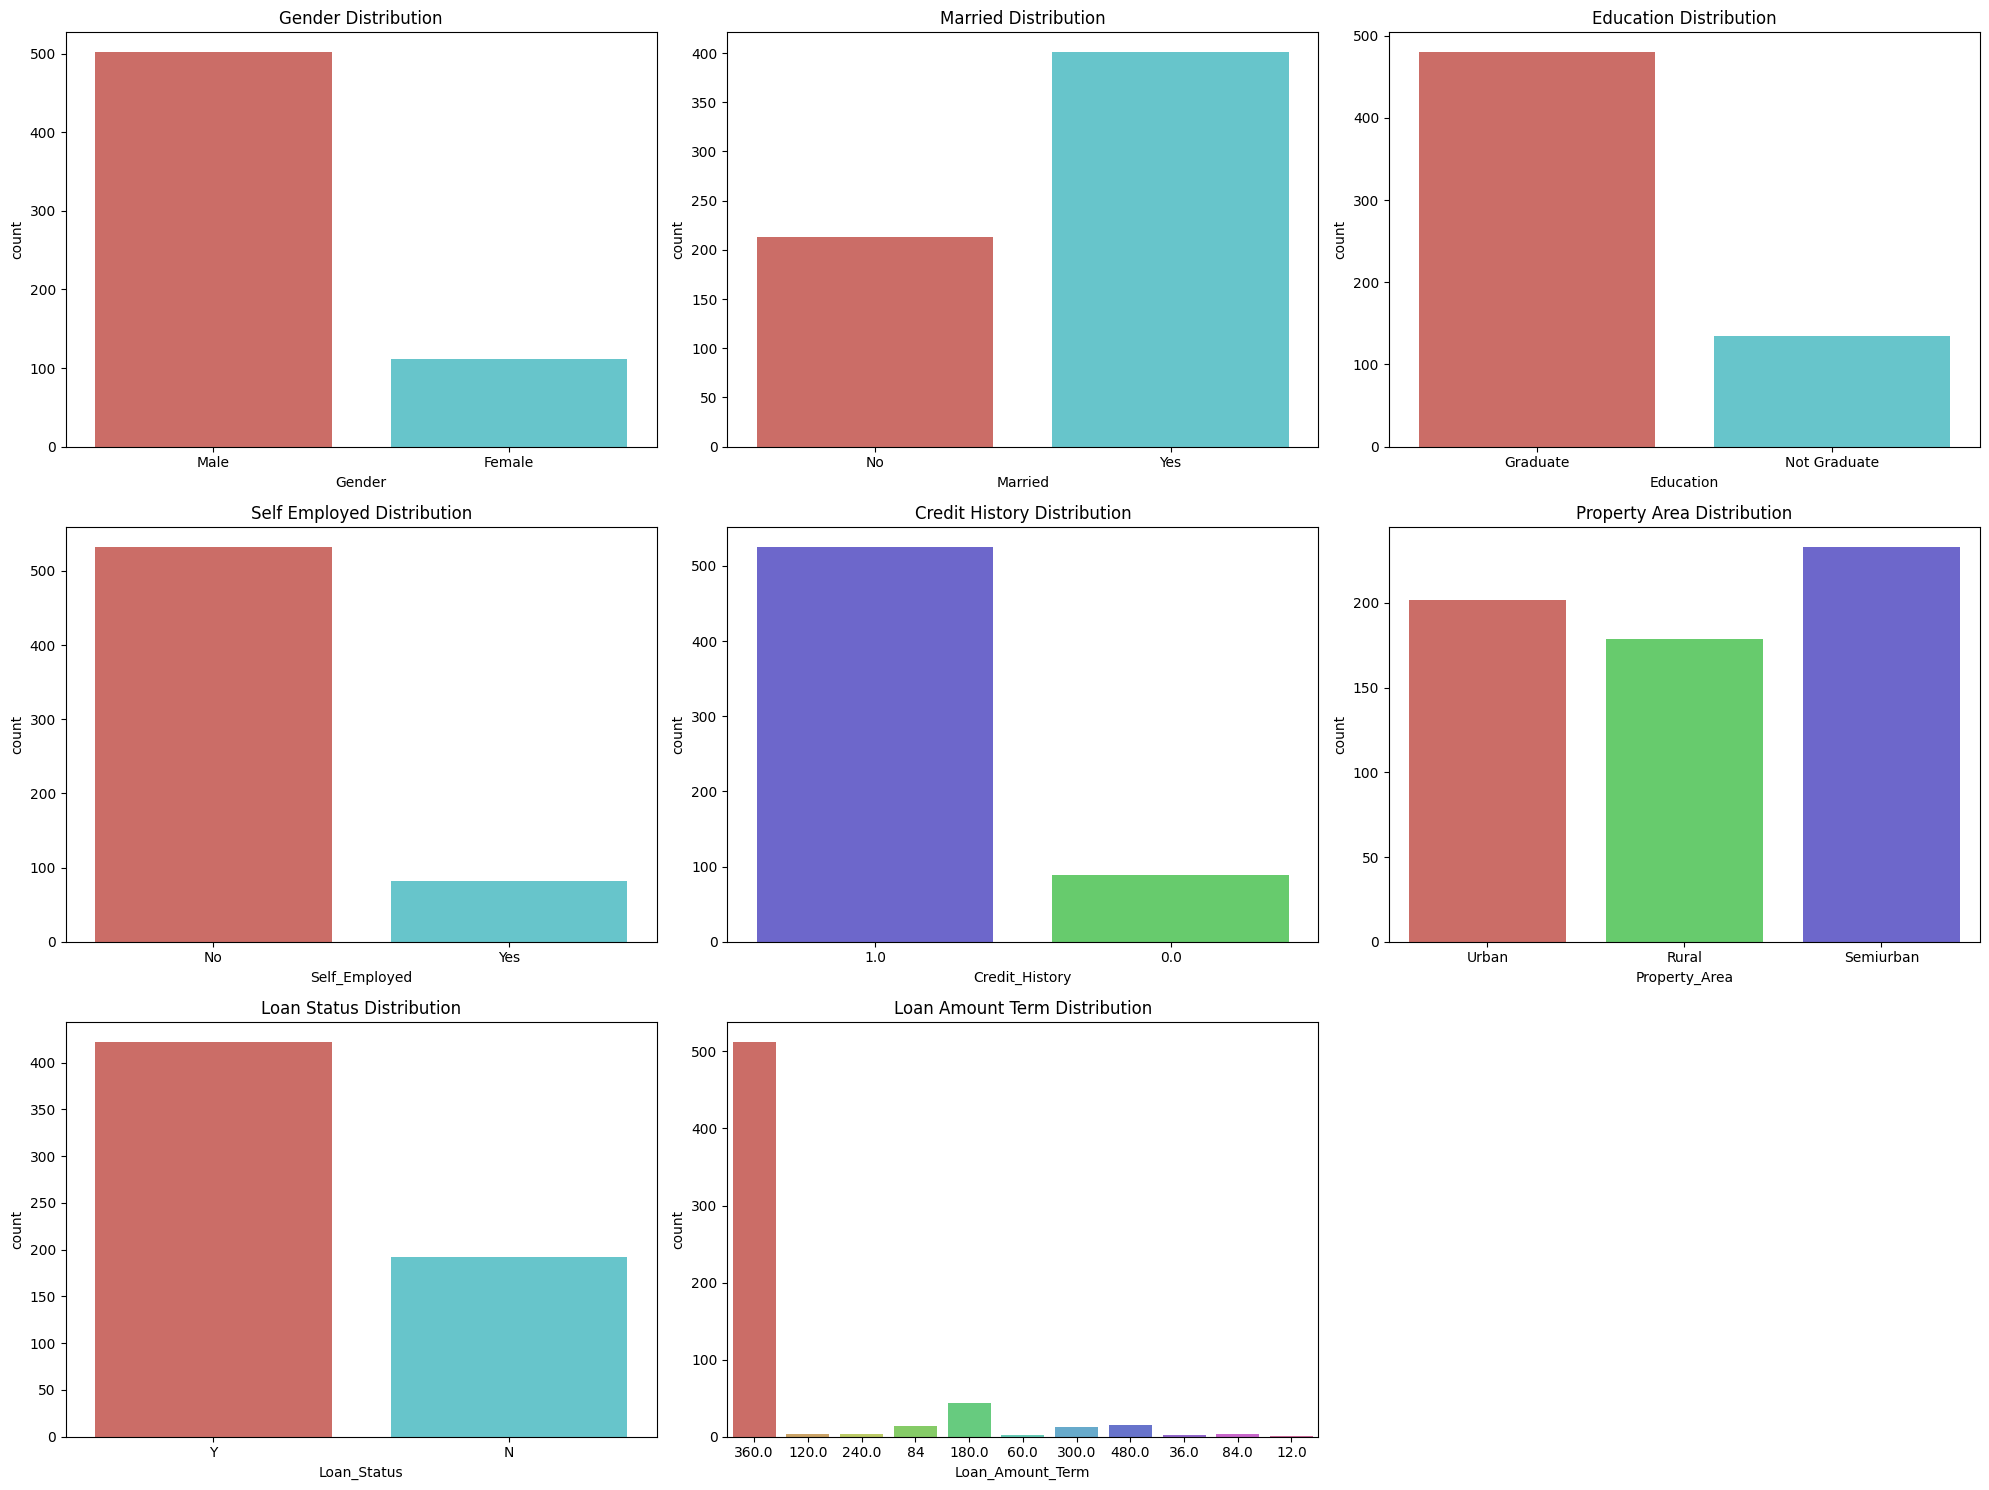

In [18]:
#1. Univariate analysis for Categorical variables / Independent Variables
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.countplot(x="Gender", data=df1, palette="hls")
plt.title("Gender Distribution")

plt.subplot(3,3,2)
sns.countplot(x="Married", data=df1, palette="hls")
plt.title("Married Distribution")

plt.subplot(3,3,3)
sns.countplot(x="Education", data=df1, palette="hls")
plt.title("Education Distribution")

plt.subplot(3,3,4)
sns.countplot(x="Self_Employed", data=df1, palette="hls")
plt.title("Self Employed Distribution")

plt.subplot(3,3,5)
sns.countplot(x="Credit_History", data=df1, palette="hls")
plt.title("Credit History Distribution")

plt.subplot(3,3,6)
sns.countplot(x="Property_Area", data=df1, palette="hls")
plt.title("Property Area Distribution")

plt.subplot(3,3,7)
sns.countplot(x="Loan_Status", data=df1, palette="hls")
plt.title("Loan Status Distribution")

plt.subplot(3,3,8)
sns.countplot(x="Loan_Amount_Term", data=df1, palette="hls")
plt.title("Loan Amount Term Distribution")

plt.tight_layout()
plt.show()

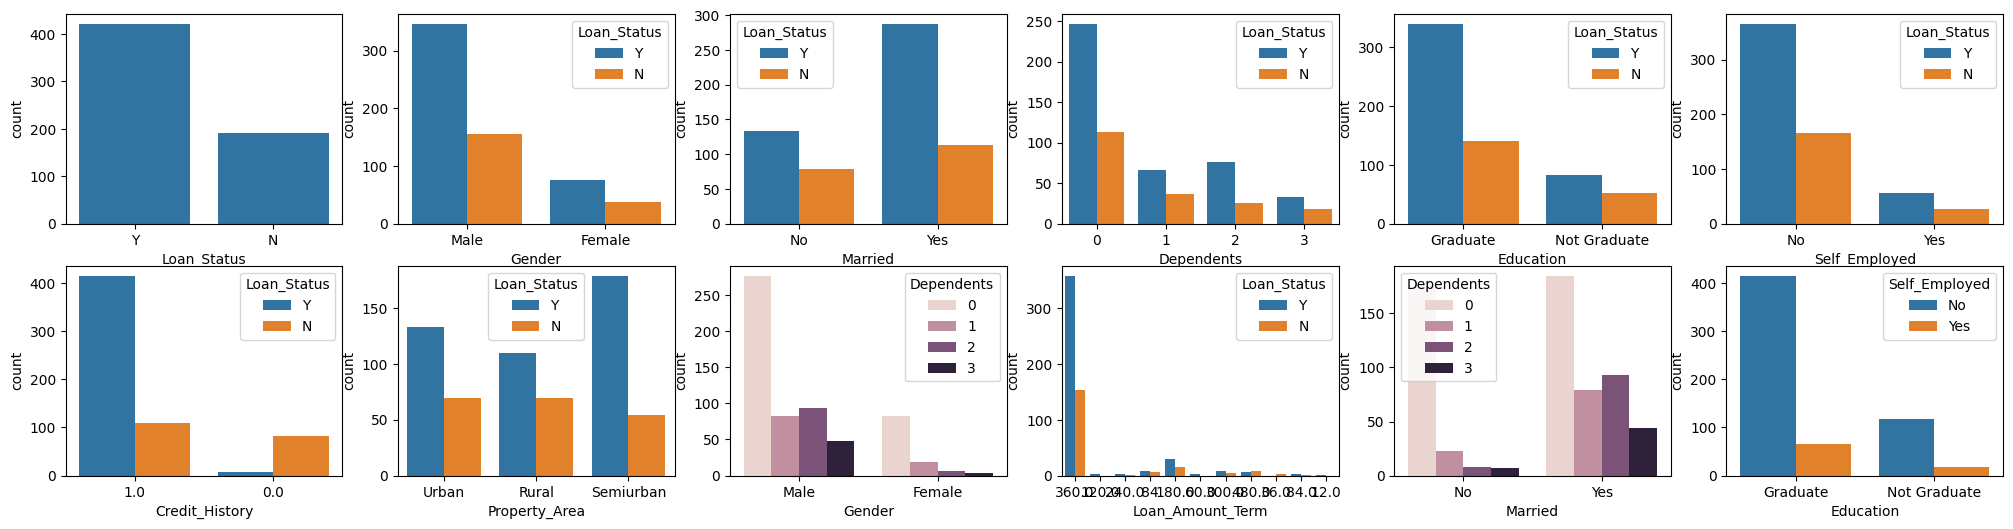

In [19]:
#2. Bivariate analysis
fig, axs = plt.subplots(figsize=(25,6),ncols=6,nrows=2)
sns.countplot(x=df1['Loan_Status'],ax=axs[0,0])
sns.countplot(x=df1['Gender'],hue=df1['Loan_Status'],ax=axs[0,1])
sns.countplot(x=df1['Married'],hue=df1['Loan_Status'],ax=axs[0,2])
sns.countplot(x=df1['Dependents'],hue=df1['Loan_Status'],ax=axs[0,3])
sns.countplot(x=df1['Education'],hue=df1['Loan_Status'],ax=axs[0,4])
sns.countplot(x=df1['Self_Employed'],hue=df1['Loan_Status'],ax=axs[0,5])
sns.countplot(x=df1['Credit_History'],hue=df1['Loan_Status'],ax=axs[1,0])
sns.countplot(x=df1['Property_Area'],hue=df1['Loan_Status'],ax=axs[1,1])
sns.countplot(x=df1['Gender'],hue=df1['Dependents'],ax=axs[1,2])
sns.countplot(x=df1['Loan_Amount_Term'],hue=df1['Loan_Status'],ax=axs[1,3])
sns.countplot(x=df1['Married'],hue=df1['Dependents'],ax=axs[1,4])
sns.countplot(x=df1['Education'],hue=df1['Self_Employed'],ax=axs[1,5])
plt.show()

<Figure size 1000x400 with 0 Axes>

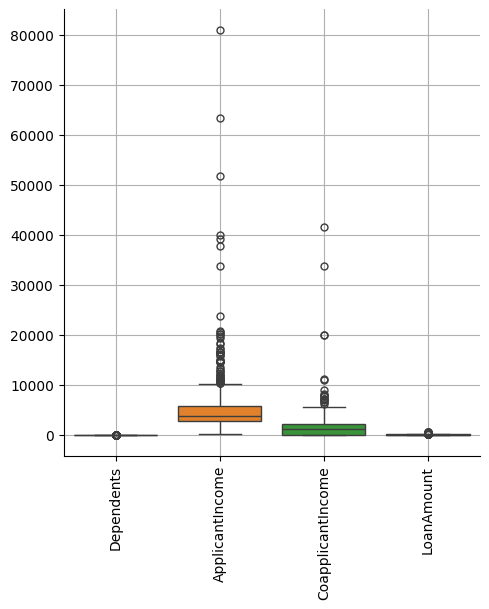

In [20]:
#3. Checking for outliers
plt.figure(figsize=(10,4))
sns.catplot(data=df1,kind='box')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [21]:
df1[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,84.037468
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.250000
50%,3812.500000,1188.500000,129.000000
75%,5795.000000,2297.250000,164.750000
max,81000.000000,41667.000000,700.000000


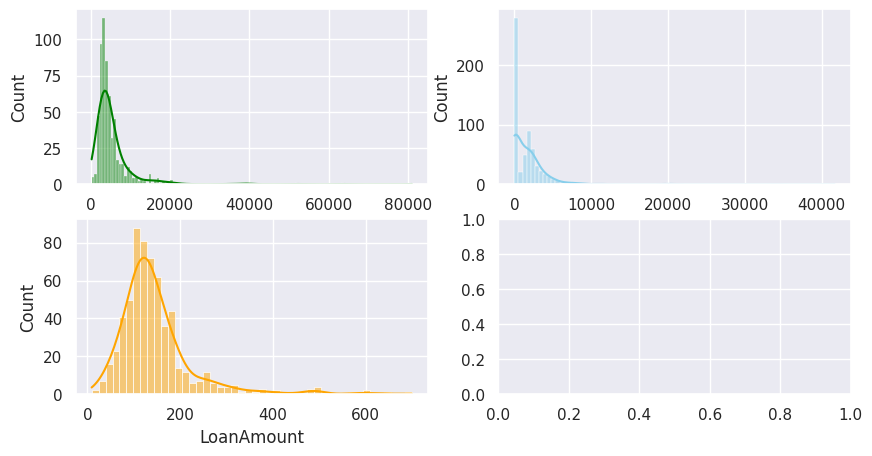

In [22]:
#3.1 Analysis on Independent Variable (Numerical Features) / Plotting the distribution of the numerical variables
#A. Histogram Distribution
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
sns.histplot(data=df1, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df1, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df1, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

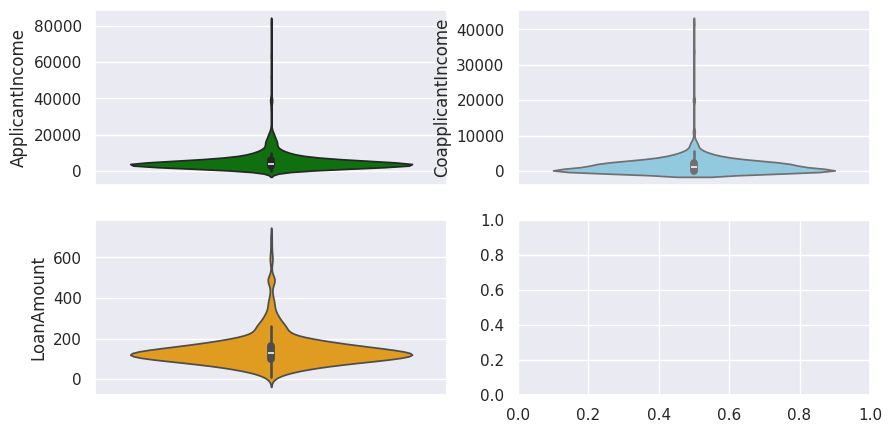

In [23]:
#B. ViolinPlot Distribution
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 5))
sns.violinplot(data=df1, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.violinplot(data=df1, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=df1, y="LoanAmount", ax=axs1[1, 0], color='orange');

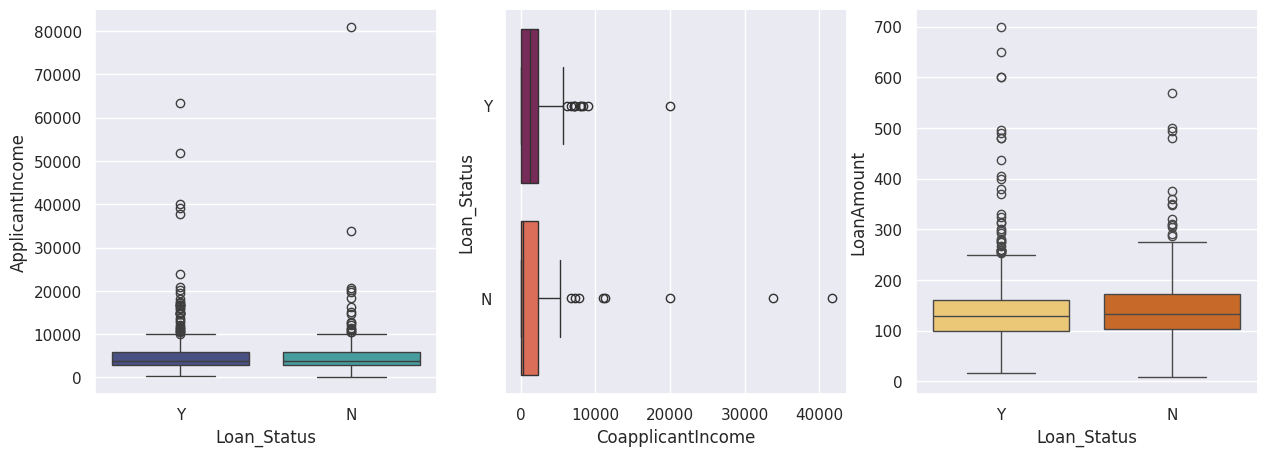

In [24]:
#C. Box Plot Distribution
sns.set(style="darkgrid")
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df1, palette="mako", ax=axs[0])
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df1, palette="rocket", ax=axs[1])
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df1, palette="YlOrBr", ax=axs[2])
plt.show()

In [26]:
# Label Mapping (Label Encoding) Categorical values

label_mapping = {'Male': 1, 'Female': 0,
'Yes': 1, 'No': 0,
'0': 0, '1': 1, '2': 2, '3+': 3 ,
'Graduate': 1, 'Not Graduate': 0,
'Urban': 1, 'Semiurban': 2,'Rural': 3,
'Y': 1, 'N': 0}

# Applying label encoding (Label Mapping) to categorical columns
df1.replace(label_mapping, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    object 
 9   Credit_History     614 non-null    object 
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 62.4+ KB


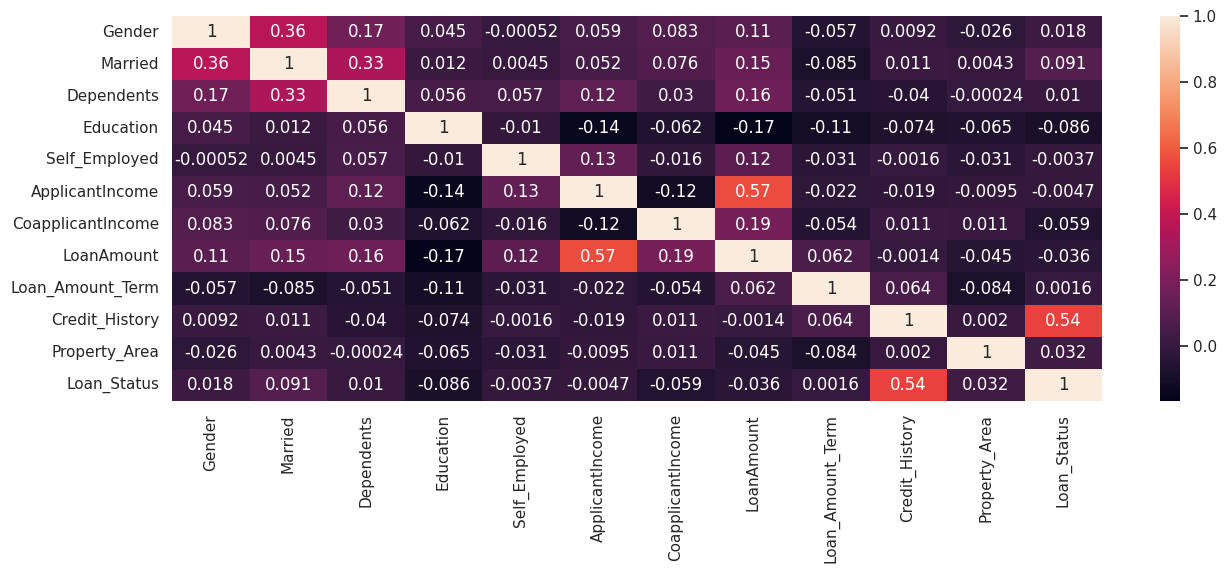

In [27]:
# Plotting Heatmap for better visualization
plt.figure(figsize=(15,5))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [28]:
# Removing Outliers & Infinite Values
def remove_outliers_iqr(df1, columns):
    for column in columns:
        # Convert the column to numeric type, handling errors
        df1[column] = pd.to_numeric(df1[column], errors='coerce')

        # Drop rows with missing values (introduced by conversion)
        df1 = df1.dropna(subset=[column])

        Q1 = df1[column].quantile(0.25)
        Q3 = df1[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df1 = df1[(df1[column] >= lower_bound) & (df1[column] <= upper_bound)]
    return df1

# Columns to check for outliers
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Remove outliers using IQR
df1 = remove_outliers_iqr(df1, columns)

**5. MACHINE LEARNING MODEL SELECTION & MODEL TRAINING**

In [29]:
# Splitting Data into Training and Testing Sets
y = df1['Loan_Status']
x = df1.drop('Loan_Status', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=0)

In [30]:
# Applying SMOTE to balance the dataset
x, y = SMOTE().fit_resample(x, y)

In [31]:
# Data Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[ 0.49376275, -1.32720303, -0.73504147, ...,  0.        ,
         0.35684846,  0.01278345],
       [ 0.49376275, -1.32720303, -0.73504147, ...,  0.        ,
        -2.80230997, -1.26982231],
       [ 0.49376275, -1.32720303, -0.73504147, ...,  0.        ,
         0.35684846,  0.01278345],
       ...,
       [ 0.49376275,  0.75346422, -0.73504147, ...,  0.        ,
         0.35684846, -1.26982231],
       [ 0.49376275,  0.75346422, -0.73504147, ...,  0.        ,
         0.35684846,  1.2953892 ],
       [ 0.49376275,  0.75346422, -0.73504147, ...,  0.        ,
         0.35684846,  1.2953892 ]])

In [32]:
# APPLYING MACHINE LEARNING MODELS
#1. LOGISTIC REGRESSION
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_lr = lr_model.predict(x_test)

# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr * 100)

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", cm_lr)

# Classification Report
cr_lr = classification_report(y_test, y_pred_lr)
print("Classification Report:\n", cr_lr)


Logistic Regression Accuracy: 85.38461538461539
Confusion Matrix:
 [[21 18]
 [ 1 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.54      0.69        39
           1       0.83      0.99      0.90        91

    accuracy                           0.85       130
   macro avg       0.89      0.76      0.80       130
weighted avg       0.87      0.85      0.84       130



In [33]:
#2. DECISION TREE CLASSIFIER
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_dtc = dtc_model.predict(x_test)

# Accuracy
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print("Decision Tree Classifier Accuracy:", accuracy_dtc * 100)

# Confusion Matrix
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
print("Confusion Matrix:\n", cm_dtc)

# Classification Report
cr_dtc = classification_report(y_test, y_pred_dtc)
print("Classification Report:\n", cr_dtc)

Decision Tree Classifier Accuracy: 83.07692307692308
Confusion Matrix:
 [[32  7]
 [15 76]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.82      0.74        39
           1       0.92      0.84      0.87        91

    accuracy                           0.83       130
   macro avg       0.80      0.83      0.81       130
weighted avg       0.85      0.83      0.83       130



In [34]:
#3. SUPPORT VECTOR CLASSIFIER
svc_model = SVC()
svc_model.fit(x_train, y_train)

# Model Evaluation
y_pred_svc = svc_model.predict(x_test)

# Accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Support Vector Classifier Accuracy:", accuracy_svc * 100)

# Confusion Matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix:\n", cm_svc)

# Classification Report
cr_svc = classification_report(y_test, y_pred_svc)
print("Classification Report:\n", cr_svc)

Support Vector Classifier Accuracy: 85.38461538461539
Confusion Matrix:
 [[21 18]
 [ 1 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.54      0.69        39
           1       0.83      0.99      0.90        91

    accuracy                           0.85       130
   macro avg       0.89      0.76      0.80       130
weighted avg       0.87      0.85      0.84       130



In [35]:
#4. RANDOM FOREST CLASSIFIER
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)

# Model Evaluation
y_pred_rfc = rfc_model.predict(x_test)

# Accuracy
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print("Random Forest Classifier Accuracy:", accuracy_rfc * 100)

# Confusion Matrix
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print("Confusion Matrix:\n", cm_rfc)

# Classification Report
cr_rfc = classification_report(y_test, y_pred_rfc)
print("Classification Report:\n", cr_rfc)

Random Forest Classifier Accuracy: 86.15384615384616
Confusion Matrix:
 [[23 16]
 [ 2 89]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.59      0.72        39
           1       0.85      0.98      0.91        91

    accuracy                           0.86       130
   macro avg       0.88      0.78      0.81       130
weighted avg       0.87      0.86      0.85       130



In [36]:
#5. KNEIGHBORS CLASSIFIER
knc_model = KNeighborsClassifier()
knc_model.fit(x_train, y_train)

# Model Evaluation
y_pred_knc = knc_model.predict(x_test)

# Accuracy
accuracy_knc = accuracy_score(y_test, y_pred_knc)
print("KNeighbors Classifier Accuracy:", accuracy_knc * 100)

# Confusion Matrix
cm_knc = confusion_matrix(y_test, y_pred_knc)
print("Confusion Matrix:\n", cm_knc)

# Classification Report
cr_knc = classification_report(y_test, y_pred_knc)
print("Classification Report:\n", cr_knc)

KNeighbors Classifier Accuracy: 84.61538461538461
Confusion Matrix:
 [[22 17]
 [ 3 88]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.56      0.69        39
           1       0.84      0.97      0.90        91

    accuracy                           0.85       130
   macro avg       0.86      0.77      0.79       130
weighted avg       0.85      0.85      0.83       130



                      Model   Accuracy
3  Random Forest Classifier  86.153846
0       Logistic Regression  85.384615
2                       SVC  85.384615
4     KNeighbors Classifier  84.615385
1  Decision Tree Classifier  83.846154


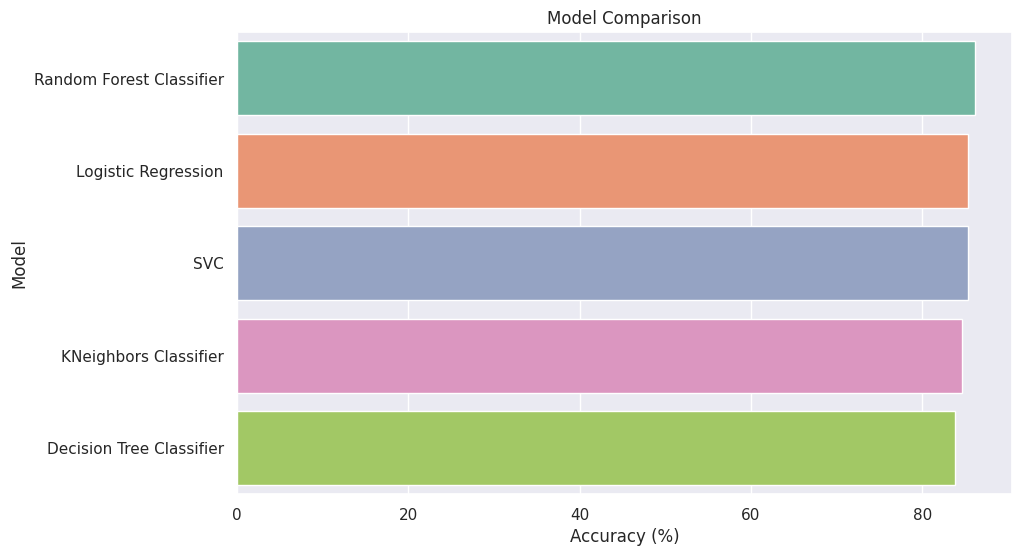

In [38]:
# Creating a dictionary to store model results
model_results = {
    'Model': ['Logistic Regression', 'Decision Tree Classifier', 'SVC', 'Random Forest Classifier', 'KNeighbors Classifier'],  # Fixed: Added missing comma
    'Accuracy': []
}

# Calculating and store accuracy for each model
model_results['Accuracy'].append(accuracy_score(y_test, LogisticRegression().fit(x_train, y_train).predict(x_test)) * 100)
model_results['Accuracy'].append(accuracy_score(y_test, DecisionTreeClassifier().fit(x_train, y_train).predict(x_test)) * 100)
model_results['Accuracy'].append(accuracy_score(y_test, SVC().fit(x_train, y_train).predict(x_test)) * 100)
model_results['Accuracy'].append(accuracy_score(y_test, RandomForestClassifier().fit(x_train, y_train).predict(x_test)) * 100)
model_results['Accuracy'].append(accuracy_score(y_test, KNeighborsClassifier().fit(x_train, y_train).predict(x_test)) * 100)

# Creating a DataFrame from the model results
results_df1 = pd.DataFrame(model_results)

# Sorting the DataFrame by accuracy in descending order
results_df1 = results_df1.sort_values(by='Accuracy', ascending=False)

# Printing the results
print(results_df1)

# Visualized the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df1, palette='Set2')
plt.xlabel('Accuracy (%)')
plt.ylabel('Model')
plt.title('Model Comparison')
plt.show()

**6. LOADING THE TESTING DATASET**

In [39]:
df2 = pd.read_csv("/content/drive/MyDrive/DBA PROJECT DATASET/loan_prediction_test.csv")
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


**7. UNDERSTANDING THE TEST DATA**

In [40]:
df2.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [41]:
df2.shape

(367, 12)

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 37.3+ KB


**8. DATA EXPLORATION AND PREPROCESSING IN TEST DATA**

In [43]:
df2.isnull().sum().sort_values(ascending=False)

,0
Credit_History,29
Self_Employed,23
Gender,11
Dependents,10
Loan_Amount_Term,6
LoanAmount,5
Loan_ID,0
Married,0
Education,0
ApplicantIncome,0


In [44]:
df2['Dependents'].value_counts()

,count
Dependents,
0,200
2,59
1,58
3+,40


In [45]:
df1['Dependents'].replace('3+',3,inplace=True)#Replacing 3+ to 3
df1['Dependents'].value_counts()

,count
Dependents,
0,265
2,74
1,64
3,28


In [46]:
df2['Gender'].fillna(df2['Gender'].mode()[0], inplace= True)
df2['Dependents'].fillna(df2['Dependents'].mode()[0], inplace= True)
df2['Self_Employed'].fillna(df2['Self_Employed'].mode()[0], inplace= True)
df2['Loan_Amount_Term'].fillna('84', inplace = True)
df2['Credit_History'].fillna('1.0', inplace = True)
df2['LoanAmount'].fillna(df2['LoanAmount'].mean(), inplace= True)

In [47]:
df2.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [48]:
df2 = df2.drop('Loan_ID', axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         367 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      367 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    object 
 9   Credit_History     367 non-null    object 
 10  Property_Area      367 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 34.4+ KB


In [49]:
df2['Credit_History'] = df2['Credit_History'].astype(float)
df2['Loan_Amount_Term'] = df2['Loan_Amount_Term'].astype(int)

In [50]:
# Label Mapping (Label Encoding) Categorical values
label_mapping = {'Male': 1, 'Female': 0,
'Yes': 1, 'No': 0,
'0': 0, '1': 1, '2': 2, '3+': 3 ,
'Graduate': 1, 'Not Graduate': 0,
'Urban': 1, 'Semiurban': 2,'Rural': 3,
'Y': 1, 'N': 0}
# Apply label encoding to categorical columns (Using the same Label mapping as training data)
df2.replace(label_mapping, inplace=True)

In [51]:
# Scaling the test data using the same scaler fitted on the training data
x_test_final = scaler.transform(df2)

In [52]:
# Predicting loan status using the trained Random Forest Classifier model
y_pred_test = rfc_model.predict(x_test)

In [53]:
# Create a DataFrame for visualization
df_predictions = pd.DataFrame({'Loan_Status_Prediction': y_pred_test})
df_predictions['Loan_Status_Prediction'] = df_predictions['Loan_Status_Prediction'].map({1: 'Y', 0: 'N'})

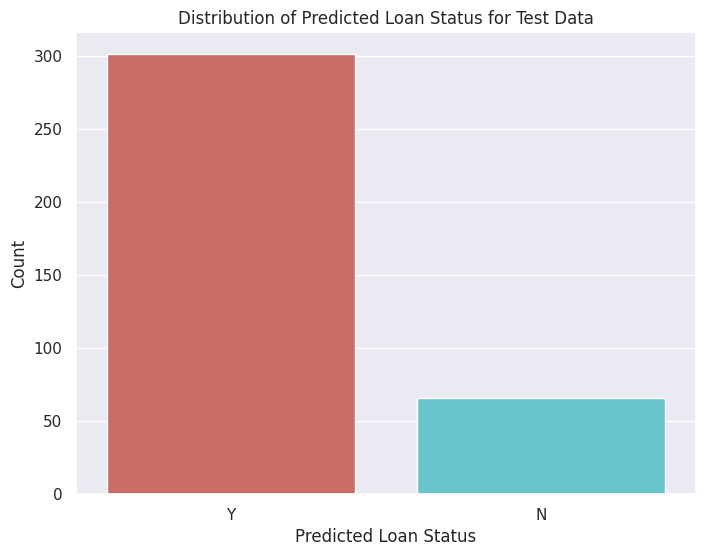

In [57]:
# Ploting the distribution of predicted loan statuses
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status_Prediction', data=df_predictions, palette="hls")
plt.xlabel('Predicted Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Predicted Loan Status for Test Data')
plt.show()

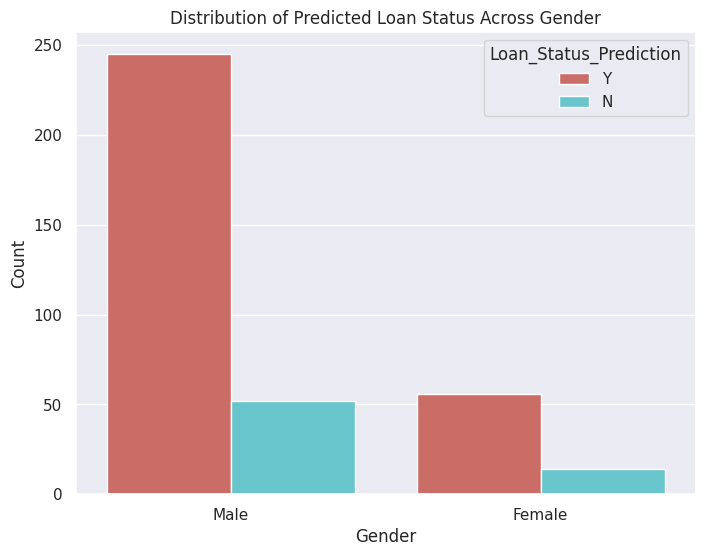

In [58]:
df_combined = pd.concat([df2, df_predictions], axis=1)

df_combined['Gender'] = df_combined['Gender'].map({1: 'Male', 0: 'Female'})

# Plot the distribution of Loan_Status_Prediction across Gender categories
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Loan_Status_Prediction', data=df_combined, palette="hls")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Predicted Loan Status Across Gender')
plt.show()

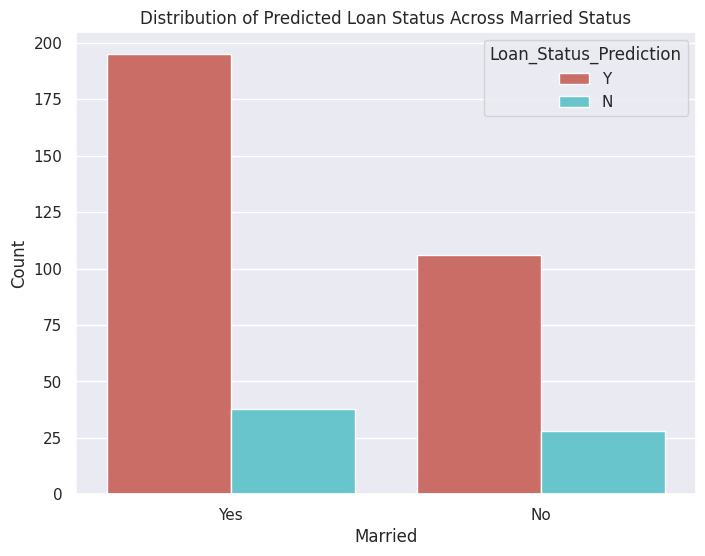

In [60]:
df_combined['Married'] = df_combined['Married'].map({1: 'Yes', 0: 'No'})

# Plot the distribution of Loan_Status_Prediction across Married categories
plt.figure(figsize=(8, 6))
sns.countplot(x='Married', hue='Loan_Status_Prediction', data=df_combined, palette="hls")
plt.xlabel('Married')
plt.ylabel('Count')
plt.title('Distribution of Predicted Loan Status Across Married Status')
plt.show()

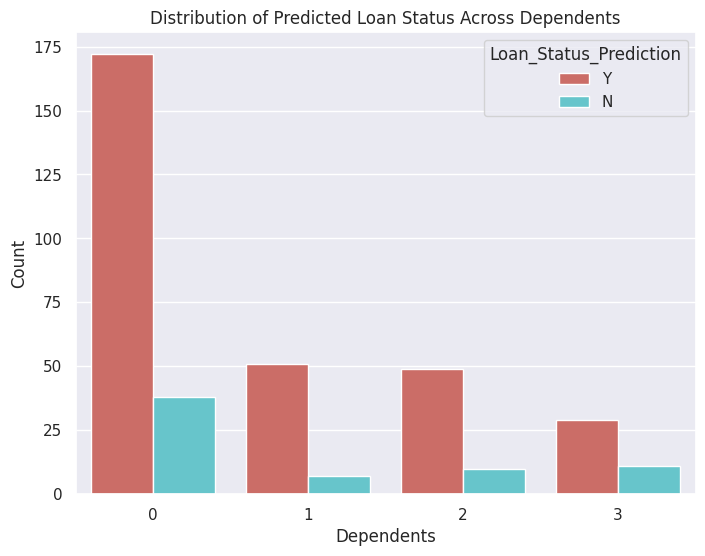

In [61]:
df_combined['Dependents'] = df_combined['Dependents'].map({0: '0', 1: '1', 2: '2', 3: '3'})

# Plot the distribution of Loan_Status_Prediction across Dependents categories
plt.figure(figsize=(8, 6))
sns.countplot(x='Dependents', hue='Loan_Status_Prediction', data=df_combined, palette="hls")
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Distribution of Predicted Loan Status Across Dependents')
plt.show()

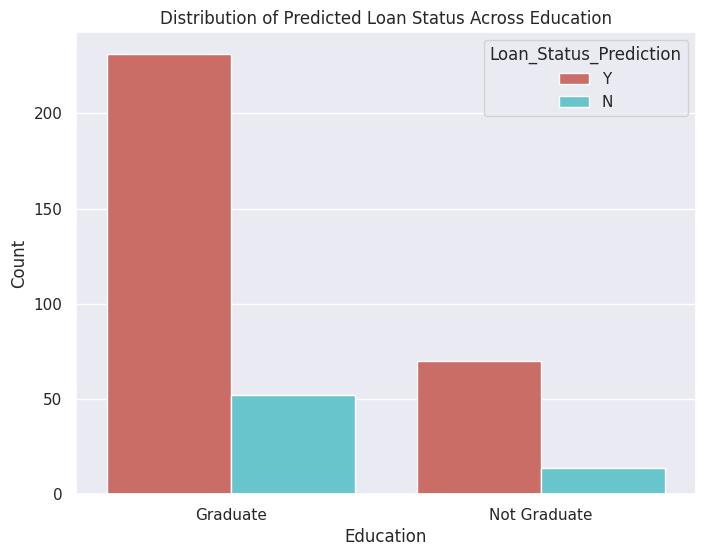

In [62]:
df_combined['Education'] = df_combined['Education'].map({1: 'Graduate', 0: 'Not Graduate'})

# Plot the distribution of Loan_Status_Prediction across Education categories
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Loan_Status_Prediction', data=df_combined, palette="hls")
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Predicted Loan Status Across Education')
plt.show()

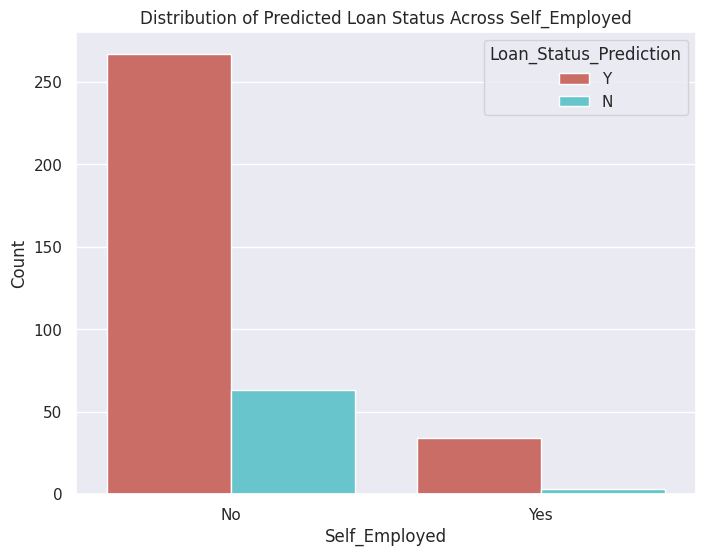

In [63]:
df_combined['Self_Employed'] = df_combined['Self_Employed'].map({1: 'Yes', 0: 'No'})

# Plot the distribution of Loan_Status_Prediction across Self_Employed categories
plt.figure(figsize=(8, 6))
sns.countplot(x='Self_Employed', hue='Loan_Status_Prediction', data=df_combined, palette="hls")
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.title('Distribution of Predicted Loan Status Across Self_Employed')
plt.show()

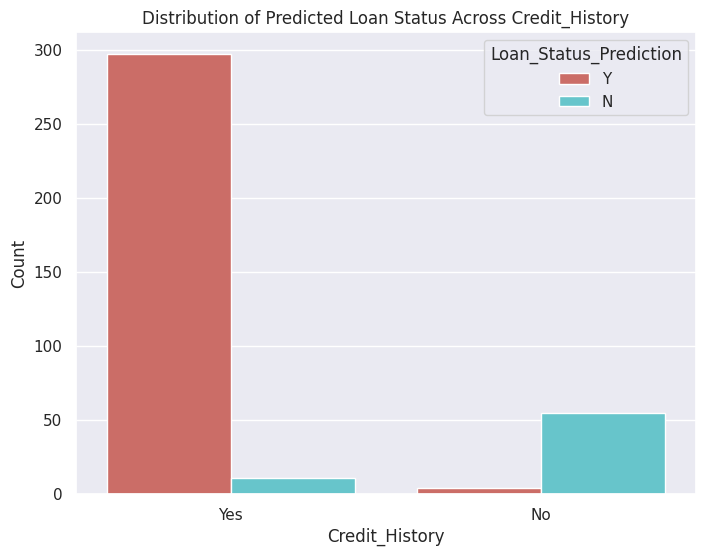

In [64]:
df_combined['Credit_History'] = df_combined['Credit_History'].map({1.0: 'Yes', 0.0: 'No'})

# Plot the distribution of Loan_Status_Prediction across Credit_History categories
plt.figure(figsize=(8, 6))
sns.countplot(x='Credit_History', hue='Loan_Status_Prediction', data=df_combined, palette="hls")
plt.xlabel('Credit_History')
plt.ylabel('Count')
plt.title('Distribution of Predicted Loan Status Across Credit_History')
plt.show()

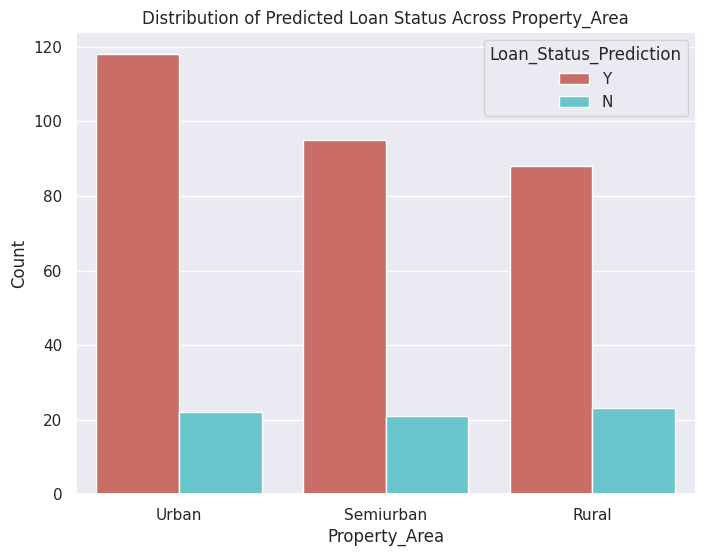

In [65]:
df_combined['Property_Area'] = df_combined['Property_Area'].map({1: 'Urban', 2: 'Semiurban', 3: 'Rural'})

# Plot the distribution of Loan_Status_Prediction across Property_Area categories
plt.figure(figsize=(8, 6))
sns.countplot(x='Property_Area', hue='Loan_Status_Prediction', data=df_combined, palette="hls")
plt.xlabel('Property_Area')
plt.ylabel('Count')
plt.title('Distribution of Predicted Loan Status Across Property_Area')
plt.show()

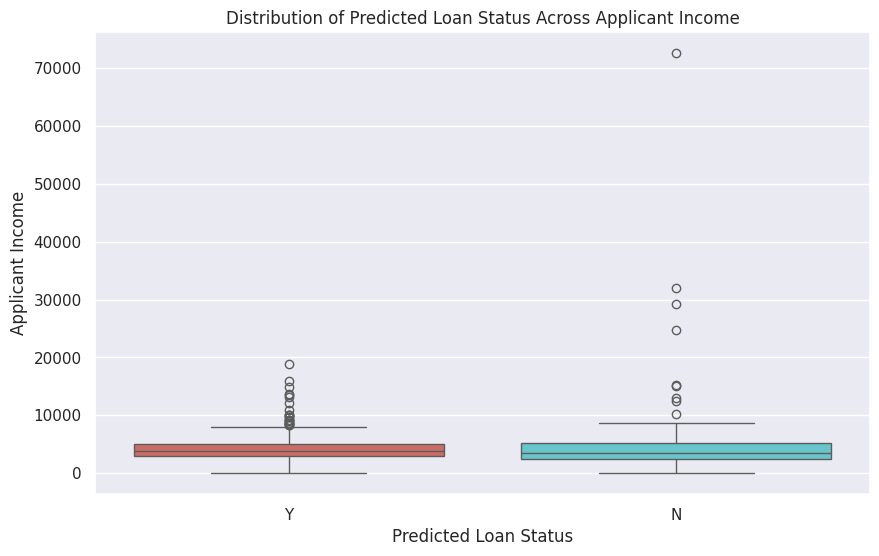

In [67]:
# Plot the distribution of Loan_Status_Prediction across ApplicantIncome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status_Prediction', y='ApplicantIncome', data=df_combined, palette="hls")
plt.xlabel('Predicted Loan Status')
plt.ylabel('Applicant Income')
plt.title('Distribution of Predicted Loan Status Across Applicant Income')
plt.show()

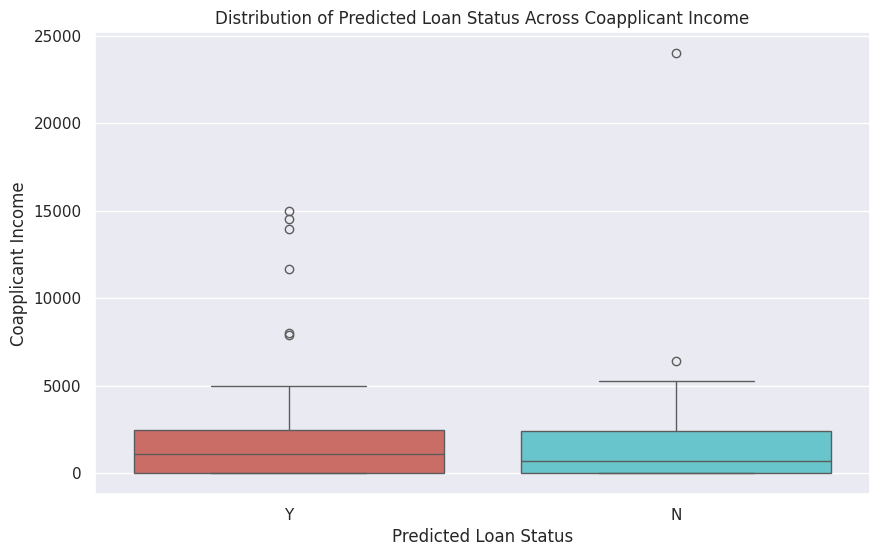

In [68]:
# Plot the distribution of Loan_Status_Prediction across CoapplicantIncome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status_Prediction', y='CoapplicantIncome', data=df_combined, palette="hls")
plt.xlabel('Predicted Loan Status')
plt.ylabel('Coapplicant Income')
plt.title('Distribution of Predicted Loan Status Across Coapplicant Income')
plt.show()

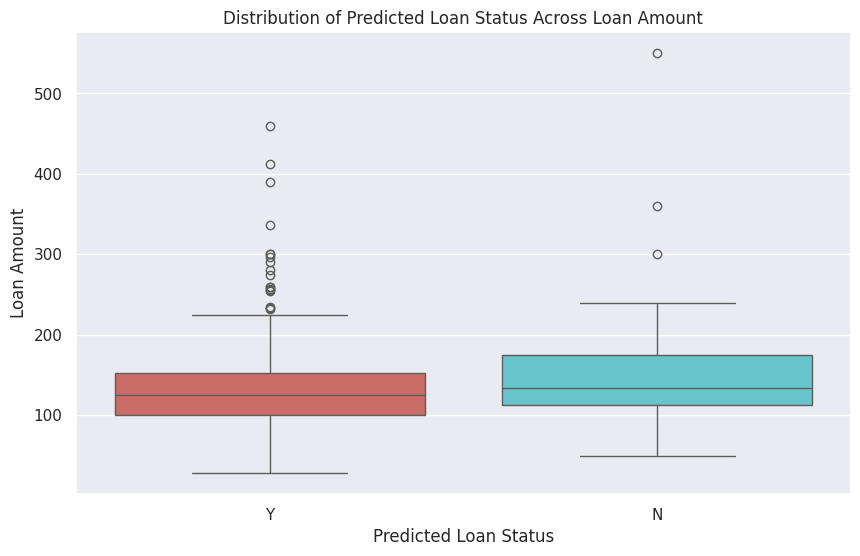

In [69]:
# Plot the distribution of Loan_Status_Prediction across LoanAmount
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status_Prediction', y='LoanAmount', data=df_combined, palette="hls")
plt.xlabel('Predicted Loan Status')
plt.ylabel('Loan Amount')
plt.title('Distribution of Predicted Loan Status Across Loan Amount')
plt.show()

In [71]:
# Calculating the percentage of loans predicted as 'Y' (approved)
percentage_approved = (df_predictions['Loan_Status_Prediction'] == 'Y').sum() / len(df_predictions) * 100
print(f"Percentage of loans predicted as approved: {percentage_approved:.2f}%")

Percentage of loans predicted as approved: 82.02%
